# Data Science 2: Multivariate Linear Regression exam april 2022
 - Date: 8 - 4 - 2022
 - Student: Hendrik Reitsma
 - Studentnumber: 444264

Import modules:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Dataset 1: Galton heights

**Dataset description and approach**

The dataset is a simple dataset containing the heights of the parents and their children. The dataset can be used to predict the childrens' height with multiple variables as input: The height of the father, the height of the mother, and the sex. Therefore, multivariate linear regression is performed on this dataset. The expected result will be that the heights of the father and mother have equal influence over the height of their children. Also the sex of the person has influence of their height as males are taller on average than females.

Galton heights data set: The dataset will be used to demonstrate multivariate linear regression

## 1.1 Multivariate Linear Regression

In [20]:
# Read in data
df = pd.read_csv('DATASET/galton.dat', sep='\s+', header=None)
df.head()

# print(df.shape)

0       1       2       3       4     5     6       7
0  family  father  mother  gender  height  kids  male  female
1       1    78.5    67.0       M    73.2     4   1.0     0.0
2       1    78.5    67.0       F    69.2     4   0.0     1.0
3       1    78.5    67.0       F    69.0     4   0.0     1.0
4       1    78.5    67.0       F    69.0     4   0.0     1.0

In [21]:
# Check for NaN values in dataframe:
# df.isnull().values.any()

# No NaN values so no .dropna() needed

# Fix the column labels
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

# Remove gender column (redundant and not a number)
df = df[['family','father', 'mother', 'height', 'kids','male', 'female']]

# Change columns to numeric except if they contain letters (errors=ignore)
df = df.apply(pd.to_numeric, errors='ignore')
df

0   family  father  mother  height  kids  male  female
1        1    78.5    67.0    73.2     4   1.0     0.0
2        1    78.5    67.0    69.2     4   0.0     1.0
3        1    78.5    67.0    69.0     4   0.0     1.0
4        1    78.5    67.0    69.0     4   0.0     1.0
5        2    75.5    66.5    73.5     4   1.0     0.0
..     ...     ...     ...     ...   ...   ...     ...
894   136A    68.5    65.0    68.5     8   1.0     0.0
895   136A    68.5    65.0    67.7     8   1.0     0.0
896   136A    68.5    65.0    64.0     8   0.0     1.0
897   136A    68.5    65.0    63.5     8   0.0     1.0
898   136A    68.5    65.0    63.0     8   0.0     1.0

[898 rows x 7 columns]

A correlation plot is drawn to quickly explore correlations and get familiar with the data.

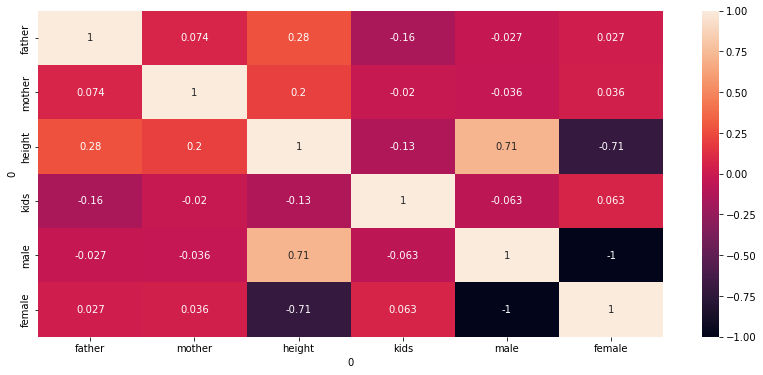

In [3]:
plt.figure(figsize=(14,6))
corr = df.corr()
sns.heatmap(data=corr, annot = True);

It can already be seen that male and female have a positive and negative effect on height. Besides that, the length of the parents have a positive correlation with the childrens' height.

The columns gender, male and female are essentially the same so only male column is used

The columns family number and amount of kids is not deemed relevant to predict the heights of the kids.

In [4]:
# Define predictors
X = df[['father', 'mother', 'male']]
# Define target
y = df.height
X

0    father  mother  male
1      78.5    67.0   1.0
2      78.5    67.0   0.0
3      78.5    67.0   0.0
4      78.5    67.0   0.0
5      75.5    66.5   1.0
..      ...     ...   ...
894    68.5    65.0   1.0
895    68.5    65.0   1.0
896    68.5    65.0   0.0
897    68.5    65.0   0.0
898    68.5    65.0   0.0

[898 rows x 3 columns]

Normalizing the data is not strictly necessary, but in doing so, the coefficients will be less different.

In [5]:
## Normalizing the data
X=(X-X.min())/(X.max()-X.min())
X=(X-X.mean())/X.std()
X

0      father    mother      male
1    3.751494  1.263788  0.964441
2    3.751494  1.263788 -1.035716
3    3.751494  1.263788 -1.035716
4    3.751494  1.263788 -1.035716
5    2.537045  1.047058  0.964441
..        ...       ...       ...
894 -0.296670  0.396870  0.964441
895 -0.296670  0.396870  0.964441
896 -0.296670  0.396870 -1.035716
897 -0.296670  0.396870 -1.035716
898 -0.296670  0.396870 -1.035716

[898 rows x 3 columns]

Make the model, fit using multivariate data X and heights of children y.

In [6]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [7]:
predictions = lm.predict(X)

In [8]:
R2 = lm.score(X,y)
print('The explained variance by the model is: ')
print(round(R2*100,1), '%')

print('The resulting coefficients are: ')
for i in range(0,len(X.columns)):
    print(round(lm.coef_[i],2), '*', X.columns[i])

print('And the intercept is: ', round(lm.intercept_, 2))

The explained variance by the model is: 
64.0 %
The resulting coefficients are: 
1.0 * father
0.74 * mother
2.61 * male
And the intercept is:  66.76


As we can see, the variance of the childrens' heights is explained for 64% by the model.

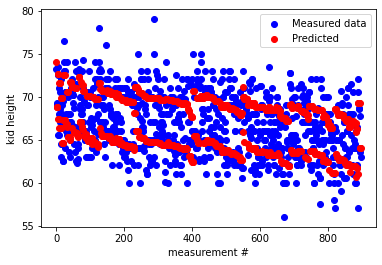

In [9]:
plt.figure()
plt.scatter(x=list(range(0, len(y))),y= y, color='blue', label='Measured data')         
plt.scatter(x=list(range(0, len(y))), y=predictions, color='red', label = 'Predicted')
plt.ylabel('kid height')
plt.xlabel('measurement #')
plt.legend()
plt.show()

Plotting the measured data and the predicted data on top of eachother shows a lot of overlap. The influence of sex is clearly visible by the two stacked red 'lines'.

Plotting the measured data and the predicted data against eachother shows indeed that they are related:

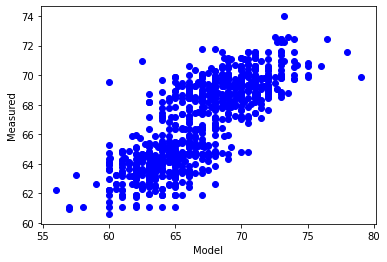

In [10]:
plt.scatter(x=y,y=predictions, color='blue') 
plt.ylabel('Measured')
plt.xlabel('Model')    
plt.show;

## 1.2 Discussion:

Multivariate linear regression was used to predict the heights of the children. The relevant columns of the dataset were used to perform the regression. It was expected that taller parents and the male sex have a positive influence on the height of the children and this was indeed the case. The result of the regression are:

The explained variance by the model is: 
64.0 %

The resulting coefficients are: 
 - 1.0 * father
 - 0.74 * mother
 - 2.61 * male

And the intercept is:  66.76

Not all of the variance is explained. This means that there are more factors influencing how tall children grow than just their parents. Although it is an important factor. Sex has the greatest effect (coef = 2.61), and the parents' height has a smaller effect (coef = 1.0 for father and coef = 0.74 for mother). The results are as expected. Multivariate regression was useful to predict the heights of children according multiple variables.


# 2. Dataset 2: transhydrogenase
Data description:

Contains molecular dynamics simulation data of wildtype and mutant forms of the protein transhydrogenase (TH). The first field of a row contains a label indicating what mutation is present (WT for wild-type). The rest of the columns contain the coordinates of the atoms in vectorized form. All structures have already been aligned to a common frame of reference using Procrustes analysis. The coordinates are thus suitable for direct further analysis. 

The question here is: is it possible to distinguish between the variants [variant] according to the given coordinates [columns]?

First let's check out the data.

In [11]:
data = pd.read_csv('transhydrogenase.csv')
# Check for NaN values in dataframe:
data.isnull().values.any()
# No NaN values, so continue
data.head()

Unnamed: 0 variant        x0        y0        z0        x1        y1  \
0           0      WT  2.232662 -0.175234  0.445381  1.430379  0.362950   
1           1      WT  3.128979  0.057618  1.338539  2.272053 -0.152276   
2           2      WT  3.667753 -0.210762  0.915047  2.665825  0.011532   
3           3      WT  3.703590 -0.266571  1.048084  2.949226  0.039815   
4           4      WT  1.998403  0.659392  0.445759  1.526339  0.522686   

         z1        x2        y2  ...      z750      x751      y751      z751  \
0  0.900745  1.328980  0.169134  ... -6.055492  2.278352 -1.216520 -7.968948   
1  1.830578  1.497686 -0.200720  ... -5.384182  2.084931 -0.777718 -6.925377   
2  1.561668  1.802264 -0.424967  ... -6.950081  3.190837 -1.746283 -8.502846   
3  1.500355  2.122021 -0.107710  ... -5.943760  3.890735 -0.656552 -7.033615   
4  0.568974  0.987137  0.083764  ... -6.176762  4.113041 -0.970990 -7.908390   

       x752      y752      z752      x753      y753      z753  
0  1.648216 -0.388278 -7.311485 -0.185457  2.266832 -9.651554  
1  1.764271 -0.837972 -5.649639 -1.866464  1.002639 -7.600162  
2  2.848035 -1.168078 -7.571968 -0.521151  0.882258 -9.594967  
3  3.355130 -0.573520 -5.763386  0.288879  1.581337 -7.494667  
4  3.842464 -0.370223 -7.094711  0.451301  1.645195 -8.377224  

[5 rows x 2264 columns]

The variant column contains the variant and the other 2262 columns contain the coordinates. Doing a regression with 2262 variables can lead to overfitting and more variables can lead to reduced accuracy of a predictive model. If there are less variables, machine learning algorithms are able to identify patters much more efficiently. Therefore, a dimension reduction is useful in this case. PCA can be used to reduce the dimensionality while retaining as much of the variation in the original dataset as possible. PCA will deal with multicollinearity (eg. density and alcohol are correlated in wine) 

## 2.1 PCA

The expectation is that PCA will reduce the amount of variables to a smaller amount while still explaining most of the variance.

In [12]:
# Define target 
y=data['variant'] # Though, PCA does not consider the target vector.
# Define predictors
X = data.iloc[:,2:]

In [13]:
## Convert to numpy array
X = X.values
X.shape

(6125, 2262)

In [14]:
X_scaled = X
# Scale the data #### Scaling the data is not necessary, as they are coordinates.
# scaler = StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)

In [15]:
# Perform PCA on the data
pca_30 = PCA(n_components=30)
pca_30.fit(X_scaled)
X_pca_30 = pca_30.transform(X_scaled)

In [16]:
# Print the cummulative amount of explained variance per component
s = np.cumsum(pca_30.explained_variance_ratio_ * 100)
i = 1
for value in s:
    if value <= 85.5:
        print('Component', i)
        print(round(value,2),'%')
        i += 1

Component 1
27.76 %
Component 2
45.47 %
Component 3
57.43 %
Component 4
63.88 %
Component 5
69.4 %
Component 6
73.36 %
Component 7
76.4 %
Component 8
78.32 %
Component 9
79.82 %
Component 10
81.11 %
Component 11
82.05 %
Component 12
82.96 %
Component 13
83.7 %
Component 14
84.36 %
Component 15
84.92 %
Component 16
85.43 %


The PCA has reduced the 2000+ features to 16 components that explain ~85%. This will be useful for futher predicitive modelling.

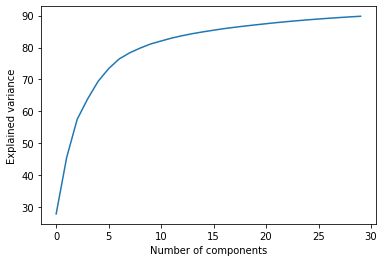

In [17]:
plt.plot(np.cumsum(pca_30.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show();

In the above plot it can be seen that more components yield less explained variance. The cutoff will be for around ~85% explained variance.

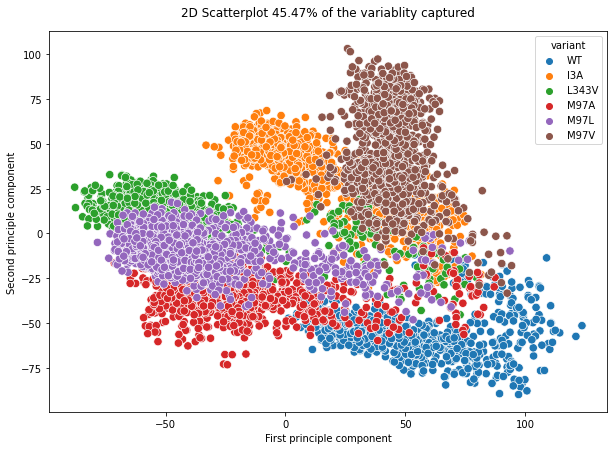

In [18]:
pca_2 = PCA(n_components=2)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca_2[:,0], y=X_pca_2[:,1], s=70, hue=y)
plt.title('2D Scatterplot 45.47% of the variablity captured', pad=15)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.show()

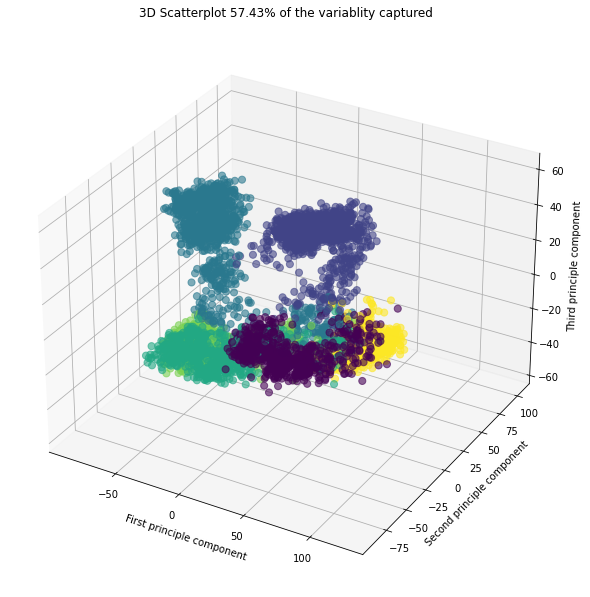

In [19]:
pca_3 = PCA(n_components=3)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)

fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection='3d')

# Colors:
variants = list(data['variant'])
# Convert to number:
colors_variant = {'WT': 0, 'I3A': 1, 'L343V': 2, 'M97A': 3, 'M97L': 4, 'M97V': 5}
colors = []
for variant in variants:
    colors.append(colors_variant[variant])

sctt = ax.scatter3D(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], s=50, alpha=0.6, c = colors)
plt.title('3D Scatterplot 57.43% of the variablity captured', pad=15)
ax.set_xlabel('First principle component')
ax.set_ylabel('Second principle component')
ax.set_zlabel('Third principle component')
plt.show()

As shown in the above plots, 2 or 3 principle components already separates the data pretty well. To create a new dataset for further steps, a new dataframe is made with principle components that explain atleast 85% of the data. In this case that is 16 principle components.

In [20]:
pca_80 = PCA(n_components=0.85)
pca_80.fit(X_scaled)
X_pca_80 = pca_80.transform(X_scaled)

X_pca_80.shape

(6125, 16)

In [21]:
df_new = pd.DataFrame(X_pca_80, columns=['PC1','PC2','PC3','PC4','PC5',
                                         'PC6','PC7','PC8','PC9','PC10',
                                         'PC11','PC12','PC13','PC14','PC15',
                                         'PC16'])
df_new['variant'] = data['variant']
df_new.head()

PC1        PC2        PC3        PC4        PC5        PC6       PC7  \
0  53.884824 -11.981280  11.786718  32.613255 -18.564230 -16.329506  1.302064   
1  57.926382 -11.327781   6.041197  27.859687 -13.052972 -15.497238  0.985879   
2  70.938567 -13.856067  12.366240  36.240861 -22.630474 -19.252945  3.236937   
3  68.157545 -18.973833  14.557656  36.286270 -20.292908 -12.732038 -4.019888   
4  54.105577 -17.767127  12.520497  41.023079 -19.948037 -14.191362 -6.904934   

         PC8        PC9       PC10       PC11       PC12      PC13       PC14  \
0  15.972322  12.693361  18.491882   7.711701  21.113801  7.251864 -19.667048   
1  18.798251   1.794053  16.156619   6.214307  12.921047  1.718374 -13.192522   
2  17.040820  10.339741  17.109280   3.738522  18.714969 -1.321672 -11.801875   
3  13.172607  11.460007  25.026233   8.893072  14.501196  0.282845  -7.712112   
4  12.350999  12.475456  23.939446  12.154427  13.849227  0.175757 -12.459600   

        PC15      PC16 variant  
0  -9.072755 -3.289223      WT  
1  -9.581190 -9.434693      WT  
2 -12.549017 -4.524348      WT  
3  -9.686899 -4.481470      WT  
4  -2.511107 -0.235097      WT

Now the PCA part is done. The result is a workable dataset with less components (from 2000+ to 16) explaining 85% of the variance.

After the dimension reduction, it is possible to do a principle component regression (PCR).

## 2.2 Principle Component Regression

Now that the dataset is reduced to a workable size. Principle Component Regression can be performed to predict the variant of the mutation. SKlearn will be used to split the dataset in a training and testing set. A random forest algorithm will be used for regression. Principle Component Regression can now be used to predict the mutation variant without using thousands of features, but just using the principle components. The results of the PCA show that distinguishing between variants will probably be possible with only a few principle components. 

In [22]:
# Define target: The mutation variant
y=data['variant']
# Define predictors: The coordinates
X = data.iloc[:,2:]

The data is split into test and training. This is done to test how well the regression model behaves later on. In this case, 20% is used to test on.

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

PCA is performed again, with varying number of principle components. The accuracy of the prediction is printed out to see how well the model performs with the amount of principal components used.

In [24]:
def pcr(n_components):

    # Perform the PCA
    pca = PCA(n_components=n_components)
    X_train_transformed = pca.fit_transform(X_train)
    X_test_transformed = pca.transform(X_test)

    classifier = RandomForestClassifier(max_depth=2, random_state=0)
    classifier.fit(X_train_transformed, y_train)

    # Predicting the results of the test set
    y_pred = classifier.predict(X_test_transformed)
    
    return accuracy_score(y_test, y_pred)

accuracy_scores = []
for i in range(1,25):
    accuracy_scores.append(pcr(i))

In [25]:
print(accuracy_scores)

[0.4473469387755102, 0.6963265306122449, 0.9020408163265307, 0.9061224489795918, 0.9142857142857143, 0.9273469387755102, 0.9355102040816327, 0.9371428571428572, 0.9322448979591836, 0.9355102040816327, 0.9363265306122449, 0.9355102040816327, 0.9436734693877551, 0.9355102040816327, 0.9404081632653061, 0.9338775510204081, 0.9387755102040817, 0.9330612244897959, 0.9355102040816327, 0.9420408163265306, 0.9404081632653061, 0.9444897959183673, 0.9436734693877551, 0.9387755102040817]


Below, the accuracy is plot against the number of principle components. Using 3 principle components already shows a 90% accuracy. In the graphs from the PCA chapter, it was clear there was already a good seperation by just using 2 principle components.

In [26]:
plt.plot(range(1,len(accuracy_scores)+1), accuracy_scores)
plt.xlabel('Number of components')
plt.ylabel('Accuracy regression')
plt.show();

## 2.3 Discussion

Principle component analysis has been done to reduce the amount of components for the following regression technique. As expected, most of the variance could be captured in an a lot smaller number of components. This is useful for the PCR step.

Principle component regression has been performed to classify the mutation variants according to their coordinates. Using a random forest algorithm and 3 principle coordinates results in a 90% accuracy of the classifications. The optimal level of accuracy is around 93-94%. Once this level is reached, the accuracy doesn't necessarily increase with increased number of principle components.